# Evaluation

Both models are evaluated against the test set which consists of 10% of the original data.

In [1]:
PATH_TO_RCNN = "faster_rcnn_resnet101_v1_1024x1024_coco17_tpu-8"
PATH_TO_SSD = "ssd_resnet101_v1_fpn_1024x1024_coco17_tpu-8"

In [2]:
def evaluate(PATH_TO_MODEL):
    !set CUDA_VISIBLE_DEVICES="-1" & python model_main_tf2.py --model_dir=training/TF2/training/{PATH_TO_MODEL} --pipeline_config_path=training/TF2/training/{PATH_TO_MODEL}/pipeline.config --SAMPLE_1_OF_N_EVAL_EXAMPLES=1 --num_train_steps=10000 --checkpoint_dir=training/TF2/training/{PATH_TO_MODEL} --alsologtostderr

In [3]:
evaluate(PATH_TO_RCNN)

2023-06-10 01:17:24.655136: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
W0610 01:17:25.896796 140258066182976 model_lib_v2.py:1081] Forced number of epochs for all eval validations to be 1.
INFO:tensorflow:Maybe overwriting sample_1_of_n_eval_examples: None
I0610 01:17:25.896878 140258066182976 config_util.py:552] Maybe overwriting sample_1_of_n_eval_examples: None
INFO:tensorflow:Maybe overwriting use_bfloat16: False
I0610 01:17:25.896921 140258066182976 config_util.py:552] Maybe overwriting use_bfloat16: False
INFO:tensorflow:Maybe overwriting train_steps: 10000
I0610 01:17:25.896959 140258066182976 config_util.py:552] Maybe overwriting train_steps: 10000
INFO:tensorflow:Maybe overwriting eval_num_epochs: 1
I0610 01:17:25.896994 140258066182976 config_util.py:552] Maybe overwriting eval_num_epochs: 1
W0610 01:17:25.897048 140258066182976 model_lib_v2.py:1099] Expected number of evaluation epochs is 1, but inste

In [18]:
evaluate(PATH_TO_SSD)

2023-06-10 01:02:10.868051: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
W0610 01:02:12.156550 139830864687936 model_lib_v2.py:1081] Forced number of epochs for all eval validations to be 1.
INFO:tensorflow:Maybe overwriting sample_1_of_n_eval_examples: None
I0610 01:02:12.156634 139830864687936 config_util.py:552] Maybe overwriting sample_1_of_n_eval_examples: None
INFO:tensorflow:Maybe overwriting use_bfloat16: False
I0610 01:02:12.156675 139830864687936 config_util.py:552] Maybe overwriting use_bfloat16: False
INFO:tensorflow:Maybe overwriting train_steps: 10000
I0610 01:02:12.156712 139830864687936 config_util.py:552] Maybe overwriting train_steps: 10000
INFO:tensorflow:Maybe overwriting eval_num_epochs: 1
I0610 01:02:12.156746 139830864687936 config_util.py:552] Maybe overwriting eval_num_epochs: 1
W0610 01:02:12.156795 139830864687936 model_lib_v2.py:1099] Expected number of evaluation epochs is 1, but inste

## Discussion

### 1. Faster R-CNN

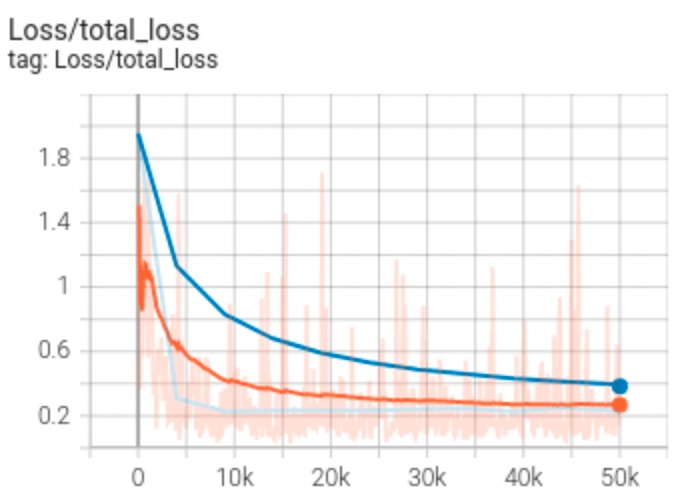
<br/>
evaluation loss (blue), training loss (orange)

According to the total loss graph, it is shown that the total loss exhibited a significant decrease throughout the training process until approximately 40,000 epochs. The evaluation loss followed a similar pattern; however, upon closer examination of the unsmoothed line (represented by light blue), it becomes apparent that the loss improvement was minimal after the 10,000th epoch. Nonetheless, both the training and evaluation losses converged to relatively low values of 0.26 and 0.38, respectively.

### 2. SSD

After running the evaluation script on the 50k-th epoch, it was noticed that the total evaluation loss for the **SSD** model is considerabely higher than the total training loss.
    
    Training:   0.49
    Evaluation: 1.02
    
**This indicates the possibility of model overfitting.**

To further invistigate this, the evaluation function was applied to multiple training checkpoints (every 5 to 10 checkpoints) accross all 50k epochs. The following graph shows both the training and evaluation loss along the all epochs.

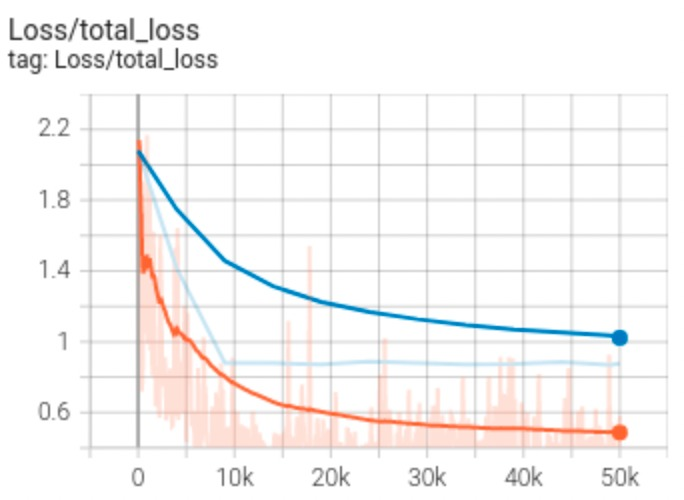

evaluation loss (blue), training loss (orange)

By looking at the graph above, the following can be observed:
1.	The training loss demonstrated a rapid decline until the **~45,000**th epoch, beyond which the change became negligible and insignificant.
2.	The evaluation loss also experienced a rapid decrease until the **~25,000**th epoch, after which the change in loss became minimal.
3.	Both the training and evaluation loss ultimately converged to 0.58 and 0.87, respectively.
4.	Since the evaluation loss did not increase again, the disparity between the losses was evidently caused by **underfitting** rather than overfitting.

To fix underfitting we can either increase the number of epochs or add more data. According to the graph, the model stopped improving at about 40k epochs. This implies that increasing the number of epochs will merely increase the computational cost without significantly enhancing performance. On the other hand, it is challenging to add new data given the current task at hand. <br/>
This gives an indication that **the SSD model is inadequate for the current task compared to Faster R-CNN.**

## Conclusion

By validating both models against the test subset, the Faster R-CNN appeared to outperform the SSD model. Faster R-CNN achieved lower validation loss while also scoring higher percision and recall. The SSD model appeared to suffer from underfitting preventing it from reaching a satisfactory validation loss. All metrics point at Faster R-CNN's superiority for the current task. Nevertheless, after running the inferencing for both models on new, previously unseen data, it will be clearer which model is the best fit for the task.